In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print ("read training set, test set")
train = pd.read_csv('data/train_v2.csv').set_index('msno')
test = pd.read_csv('data/sample_submission_v2.csv').set_index('msno')
test['is_churn'] = np.nan

read training set, test set


In [3]:
user_logs2 = pd.read_csv('data/user_logs_v2.csv',parse_dates=['date'])
user_logs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          datetime64[ns]
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 1.2+ GB


In [4]:
temp = pd.merge(train.reset_index(),user_logs2,on='msno',how='left')
temp['weekday'] = temp['date'].dt.dayofweek
# temp2 = pd.DataFrame(temp.groupby('msno').agg({'is_churn':'mean',
#                                                'date':'count',
#                                                'num_25':['min','max','mean','std'],
#                                                'num_50':'mean',
#                                                'num_985':'mean',
#                                                'num_100':['min','max','mean','std'],
#                                                'num_unq':['min','max','mean','std'],
#                                                'total_secs':['min','max','mean','std']}))
# temp2.head()
temp2 = pd.DataFrame(temp.groupby('msno')
                     .agg({'is_churn':'mean',
                           'date':'count',
                           'num_25':'mean',
                           'num_50':'mean',
                           'num_985':'mean',
                           'num_100':'mean',
                           'num_unq':'mean',
                           'total_secs':'mean'}))
temp2.head()
temp2 = temp2.dropna()

In [24]:
temp2 = (pd.DataFrame(temp.groupby('msno').agg({'is_churn':'mean',
                                       'date':'count',
                                       'num_25':['min','max','median','std'],
                                       'num_50':'median',
                                       'num_985':'median',
                                       'num_100':['min','max','median','std'],
                                       'num_unq':['min','max','median','std'],
                                       'total_secs':['min','max','median','std']})))

temp2['is_churn_all'] = temp2['is_churn','mean']
temp3 = pd.DataFrame(temp2.groupby('is_churn_all').agg(['median','mean','std']).unstack(level=1)).unstack()
temp3['diff'] = (temp3.iloc[:,1]-temp3.iloc[:,0])/temp3.iloc[:,1] * 100
temp3

0                      diff
is_churn_all                         0             1            
date       count  median     14.000000     10.000000  -40.000000
                  mean       14.096925     12.326554  -14.362251
                  std        11.354171     11.012643   -3.101237
is_churn   mean   median      0.000000      1.000000  100.000000
                  mean        0.000000      1.000000  100.000000
                  std         0.000000      0.000000         NaN
num_100    max    median     53.000000     50.000000   -6.000000
                  mean       68.000773     65.321541   -4.101606
                  std        69.144651     60.730361  -13.855162
           median median     13.000000     13.000000    0.000000
                  mean       20.906426     20.956128    0.237172
                  std        27.379432     26.813900   -2.109100
           min    median      1.000000      1.000000    0.000000
                  mean        3.254761      3.465893    6.091710
                  std         9.748040      9.582641   -1.726022
           std    median     14.871928     15.094547    1.474834
                  mean       18.956081     19.225555    1.401644
                  std        18.014340     16.586305   -8.609726
num_25     max    median     14.000000     13.000000   -7.692308
                  mean       23.460109     22.886236   -2.507503
                  std        32.179663     36.277125   11.294893
           median median      2.000000      2.000000    0.000000
                  mean        3.350599      3.605810    7.077789
                  std         5.739461      7.254520   20.884350
           min    median      0.000000      0.000000         NaN
                  mean        0.324308      0.403652   19.656377
                  std         2.421512      2.382669   -1.630216
           std    median      4.283175      4.302873    0.457794
                  mean        6.496639      6.662094    2.483525
                  std         8.280018      9.990734   17.123027
num_50     median median      0.000000      0.500000  100.000000
                  mean        0.680906      0.757946   10.164431
                  std         1.362216      1.360012   -0.162111
num_985    median median      0.000000      0.000000         NaN
                  mean        0.497417      0.541292    8.105551
                  std         1.510116      1.310871  -15.199457
num_unq    max    median     54.000000     53.000000   -1.886792
                  mean       65.231497     64.026020   -1.882793
                  std        50.429857     51.138469    1.385673
           median median     15.000000     15.500000    3.225806
                  mean       20.767364     21.325931    2.619192
                  std        20.418405     21.225365    3.801867
           min    median      2.000000      2.000000    0.000000
                  mean        3.928687      4.274645    8.093272
                  std         7.173854      8.224323   12.772709
           std    median     15.242134     15.724884    3.069974
                  mean       17.945639     18.523344    3.118794
                  std        12.836998     13.314588    3.586967
total_secs max    median  13778.813000  13214.933000   -4.266991
                  mean    17334.278329  16698.695043   -3.806185
                  std     16395.050279  14483.393295  -13.198958
           median median   3626.109000   3658.263500    0.878955
                  mean     5544.857640   5572.855820    0.502403
                  std      6602.488949   6507.757573   -1.455668
           min    median    398.138000    410.250500    2.952464
                  mean      949.601832   1004.572816    5.472076
                  std      2390.035344   2370.754835   -0.813265
           std    median   3867.266020   3933.810154    1.691595
                  mean     4807.843873   4886.410631    1.607862
                  std      4280.319651   3947.259410   -8.437759

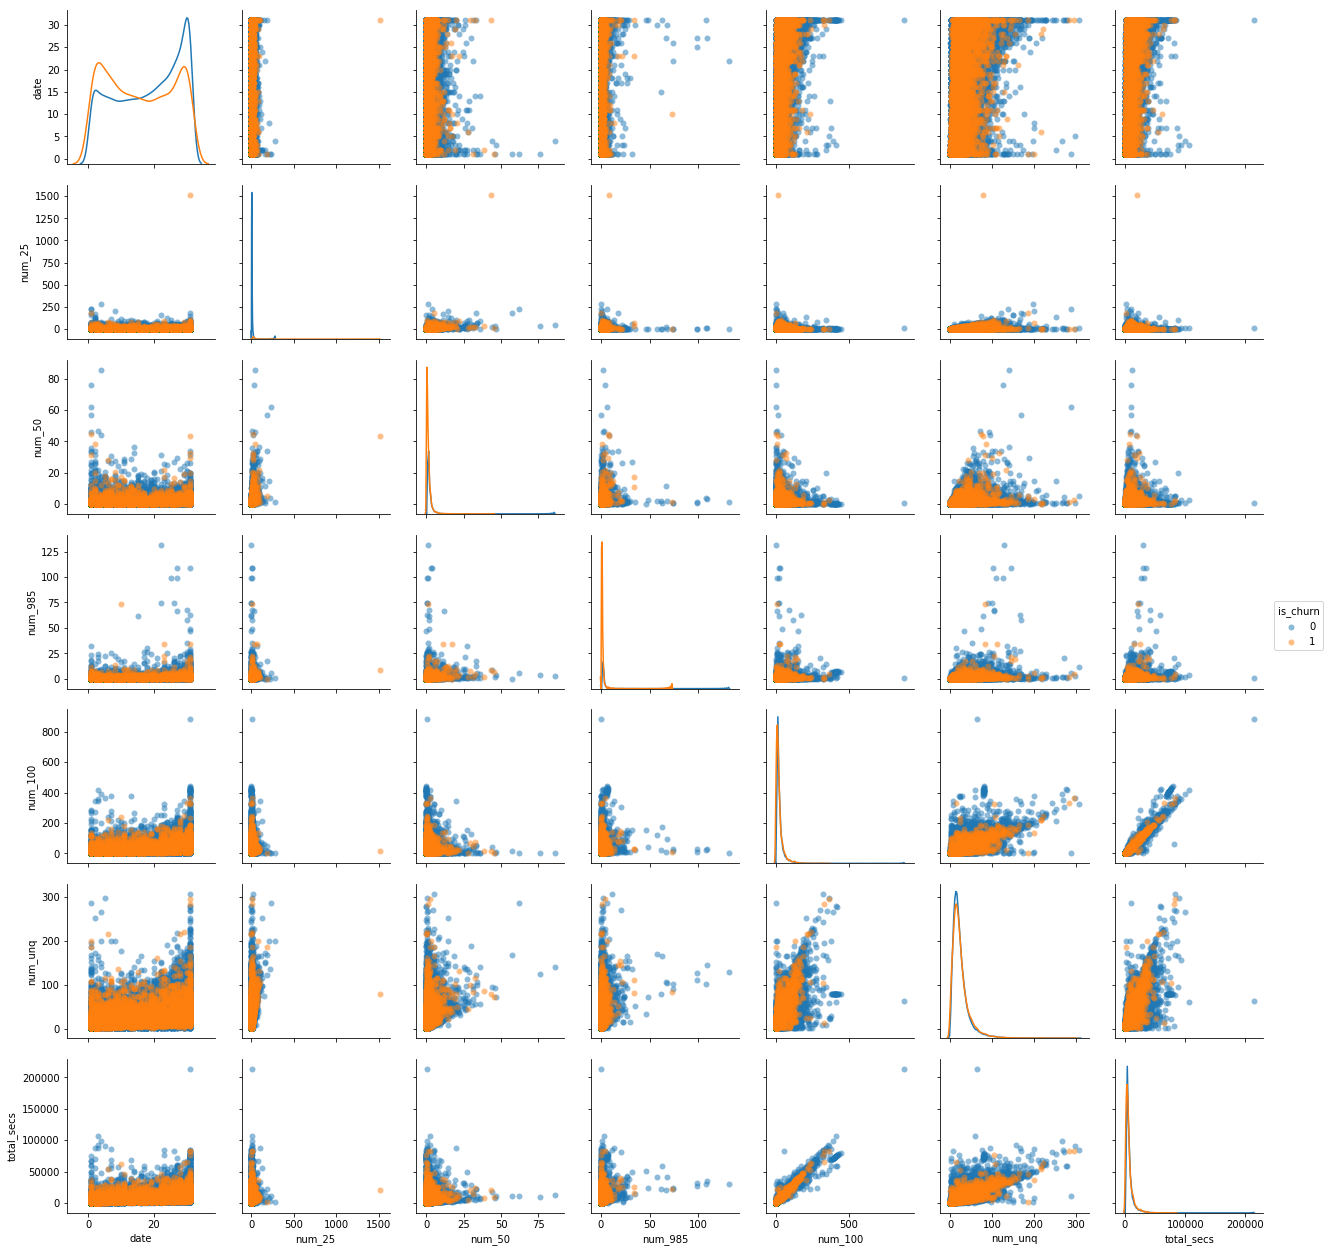

In [5]:
cols = ['is_churn','date','num_25','num_50','num_985','num_100','num_unq','total_secs']
sub_sample = temp2.sample(frac=0.1,random_state=0)
g = sns.pairplot(sub_sample,hue='is_churn',
                 x_vars = cols[1:],
                 y_vars = cols[1:],
                 plot_kws=dict(alpha=0.5,linewidths=0),
                 diag_kind="kde")

In [15]:
sub_sample.shape

(75455, 8)

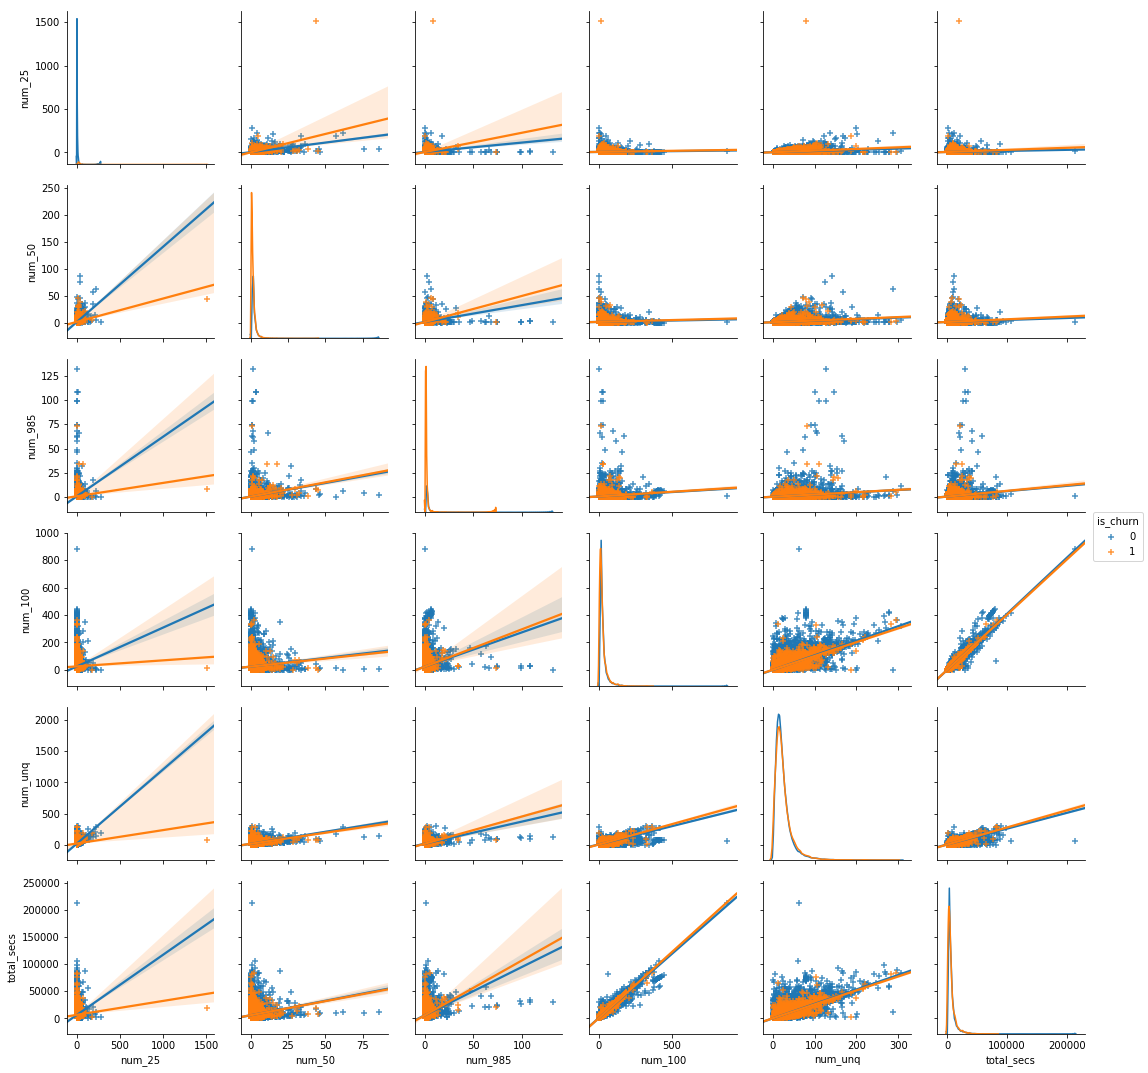

In [23]:
cols = ['is_churn','date','num_25','num_50','num_985','num_100','num_unq','total_secs']
sub_sample = temp2.sample(frac=0.1,random_state=0)
g = sns.pairplot(sub_sample,hue='is_churn',
                 markers="+",
                 x_vars = cols[2:],
                 y_vars = cols[2:],
                 plot_kws=dict(n_boot=500, x_jitter=.1),
                 diag_kind="kde",
                 kind='reg')

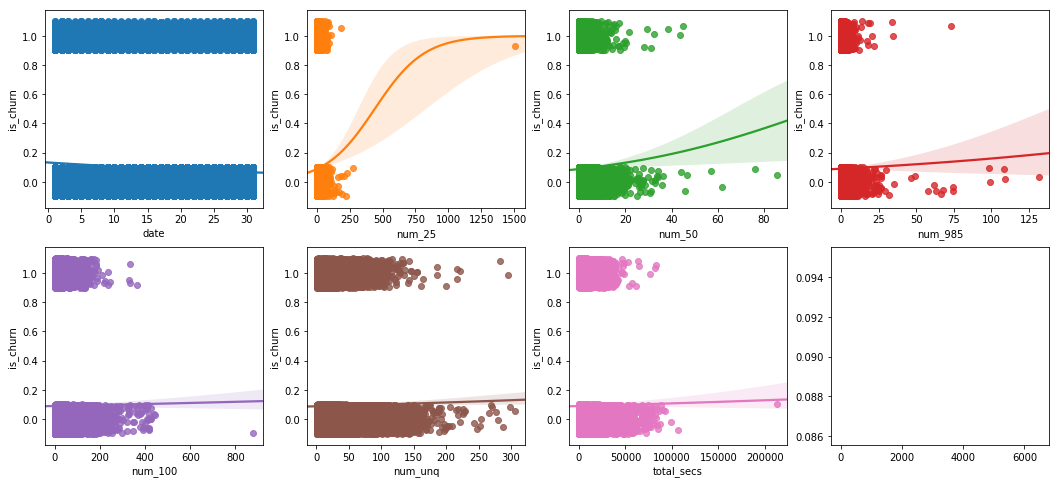

In [8]:
cols = ['is_churn','date','num_25','num_50','num_985','num_100','num_unq','total_secs']
f ,axes = plt.subplots(2,4,figsize=(18,8))
for n,ax in enumerate(axes.flat):
    if n<7:
        sns.regplot(x=cols[n+1],y='is_churn',data=sub_sample,
                    logistic=True, n_boot = 500,
                    x_jitter=None, y_jitter= 0.1, ax=ax)
    else:pass

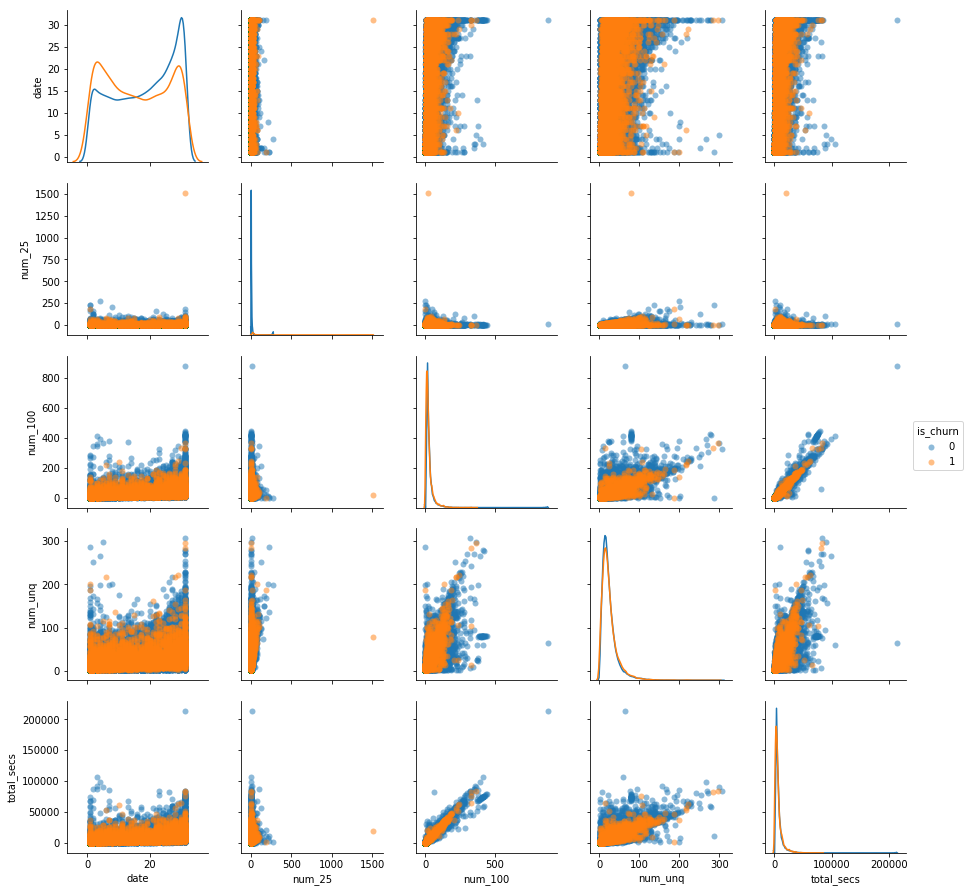

In [9]:
cols = ['is_churn','date','num_25','num_100','num_unq','total_secs']
g = sns.pairplot(sub_sample,hue='is_churn',
                 x_vars = cols[1:],
                 y_vars = cols[1:],
                 plot_kws=dict(alpha=0.5,linewidths=0),
                 diag_kind="kde")

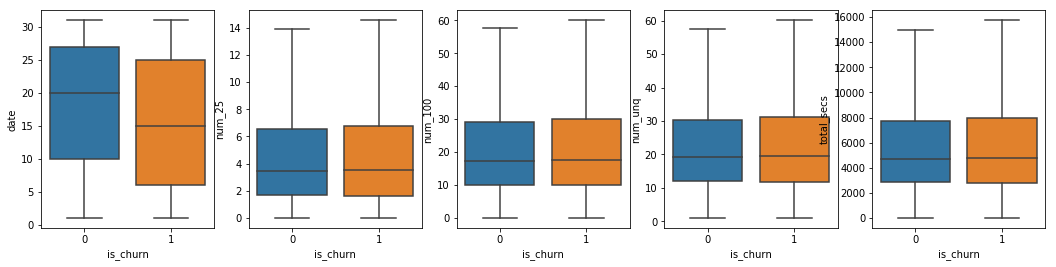

In [10]:
f ,axes = plt.subplots(1,5,figsize=(18,4))
for n,ax in enumerate(axes.flat):
    sns.boxplot(y=cols[n+1],x='is_churn',data=sub_sample,whis=1.5, ax=ax, showfliers=False)

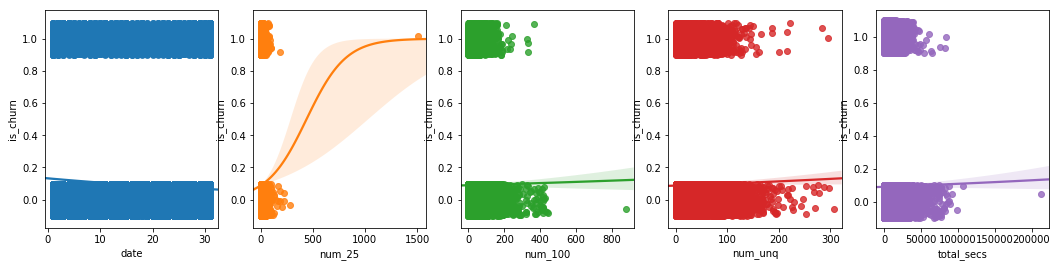

In [11]:
f ,axes = plt.subplots(1,5,figsize=(18,4))
for n,ax in enumerate(axes.flat):
    sns.regplot(x=cols[n+1],y='is_churn',data=sub_sample,
                logistic=True, n_boot = 100,
                x_jitter=None, y_jitter= 0.1, ax=ax)

In [18]:
sub_sample.shape
sub_sample.head()

,is_churn,date,num_25,num_50,num_985,num_100,num_unq,total_secs
msno,,,,,,,,
mAPbx1AD7uLc+4GK53Zs/l/VwtYqKX4MfNqv9RSC+28=,0,29,2.793103,0.448276,0.241379,25.379310,23.068966,6619.382448
3hDbs7MrqQtGkYxnhiPEu0r9P37WEfSgjAb4MQ1N8RA=,1,1,1.000000,1.000000,0.000000,33.000000,34.000000,7781.908000
MDyMiCO7D+A1Ub6UqL/SPmtZjKpSShJOADvvuS30ZYw=,1,6,1.666667,0.666667,0.166667,8.000000,10.500000,2114.381333
syYLMOpQ+H9iYToPUYeyvsolbbIu++W3ndoUi7oDfu8=,0,10,5.400000,1.800000,0.400000,36.600000,36.700000,8606.138400
FS69vJS68EQ2tOXfvocF0xySwA3wA3wZN0YGPQaKBPA=,0,29,15.586207,2.344828,3.068966,43.965517,40.034483,12441.263621


/home/yhh281/anaconda2/envs/pydata/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


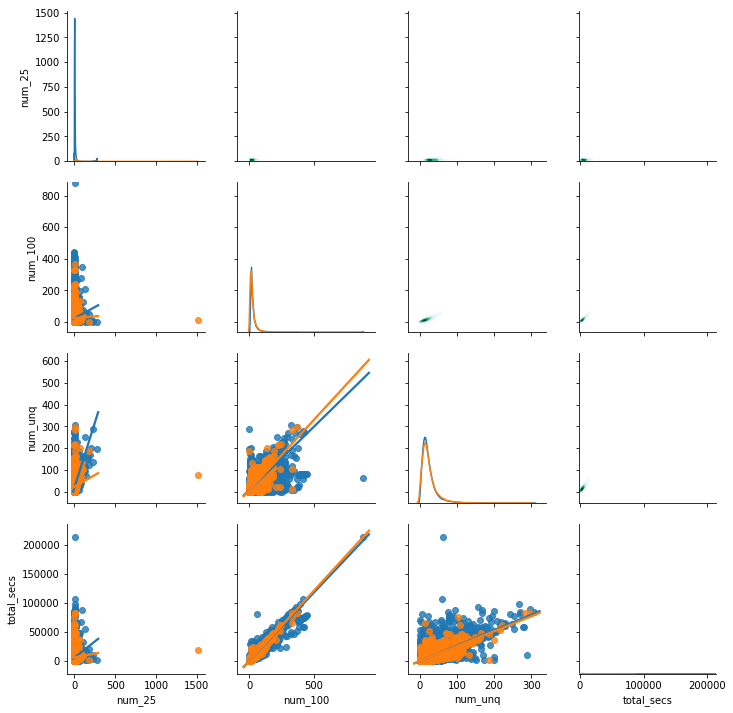

In [19]:
cols = ['is_churn','date','num_25','num_100','num_unq','total_secs']
list_of_cmaps=['Blues','Reds']
g = sns.PairGrid(sub_sample,
                 hue='is_churn',
                 x_vars = cols[2:],
                 y_vars = cols[2:],
                 diag_sharey=True)
g.map_lower(sns.regplot,ci=0.95,n_boot=500,x_jitter=.1)
g.map_diag(sns.kdeplot)
g.map_upper(sns.kdeplot, n_levels=30, shade=True, shade_lowest=False)
#g.map_upper(plt.scatter,alpha=0.5,linewidths=0)